## 사인 함수 예측

### 딥러닝 절차

모델 정의 -> [모델 순전파(입력층->노드->출력층) -> 오차 계산 -> 오차역전파(가중치 업데이트)] -> []반복(손실 최소화) -> 학습 종료 -> 모델 사용

### 사인 함수 예측 절차

1. 랜덤하게 가중치 적용하여 사인곡선 그리기
1. 


In [2]:
import math
import torch
import matplotlib.pyplot as plt

In [5]:
x = torch.linspace(-math.pi, math.pi, 1000)
x[:10]

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850])

In [6]:
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)
y[:10]

tensor([ 8.7423e-08, -6.2894e-03, -1.2579e-02, -1.8867e-02, -2.5155e-02,
        -3.1442e-02, -3.7728e-02, -4.4012e-02, -5.0295e-02, -5.6575e-02])

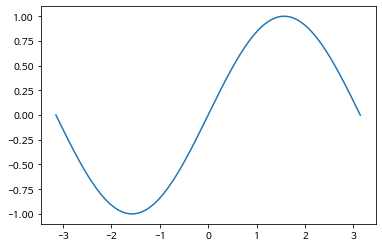

In [16]:
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x, y)
plt.show()

In [17]:
# 임의의 가중치(계수) 뽑아서 예측 사인 곡선 y 만들기
a, b, c, d = [torch.randn(()) for i in range(4)]
# a = torch.randn(())
# b = torch.randn(())
# c = torch.randn(())
# d = torch.randn(())
a, b, c, d

(tensor(0.4600), tensor(-1.1571), tensor(1.1807), tensor(0.5696))

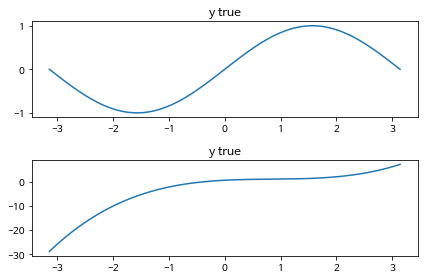

In [18]:
y_random = a * x**3 + b * x**2 + c * x + d

# 정답
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

# 예측
plt.subplot(2, 1, 2)
plt.title('y true')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

In [20]:
learning_rate = 1e-6

for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d
    loss = (y_pred - y).pow(2).sum().item()  # 손실함수 정의
    if epoch % 100 == 0:
        print(f'epoch({epoch+1}) loss:{loss}')
    
    grad_y_pred = 2.0 * (y_pred - y) # 기울기 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d =  grad_y_pred.sum()
    
    a -= learning_rate * grad_a # 가중치 업데이트
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

epoch(1) loss:71824.8984375
epoch(101) loss:243.87081909179688
epoch(201) loss:200.19113159179688
epoch(301) loss:168.5479736328125
epoch(401) loss:142.0349884033203
epoch(501) loss:119.81693267822266
epoch(601) loss:101.19578552246094
epoch(701) loss:85.58743286132812
epoch(801) loss:72.50303649902344
epoch(901) loss:61.533260345458984
epoch(1001) loss:52.33539962768555
epoch(1101) loss:44.62245178222656
epoch(1201) loss:38.154075622558594
epoch(1301) loss:32.728878021240234
epoch(1401) loss:28.178260803222656
epoch(1501) loss:24.360836029052734
epoch(1601) loss:21.158227920532227
epoch(1701) loss:18.471174240112305
epoch(1801) loss:16.216476440429688
epoch(1901) loss:14.324440002441406


## 보스톤 집값 예측

In [22]:
from sklearn.datasets import load_boston

dataset = load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [34]:
model = nn.Sequential(
    nn.Linear(13, 100), # df.shape => (516, 13) target 제외
    nn.ReLU(),
    nn.Linear(100, 1)
)

model

Sequential(
  (0): Linear(in_features=13, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [35]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y.shape

((506, 13), (506,))

In [ ]:
batch_size = 100
learning_rate = 0.001

optim = Adam(model.parameters(), lr=learning_rate)

for epoch in range(200):
    for i in range(len(X) // batch_size):
        start = i * batch_size
        end = start + batch_size
        
        # 파이토치 실수형 텐서로 변환
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(y[start:end])
        